In [37]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [38]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world.head()

C:\Users\chira\AppData\Local\Temp\ipykernel_5616\1460424072.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [39]:
cities = gpd.read_file("data/ancient_cities.geojson")
cities.head()

,City,OtherName,Country,Latitude,Longitude,Certainty,BC_3700,BC_3500,BC_3300,BC_3000,...,AD_200,AD_300,AD_400,AD_500,AD_600,AD_700,AD_800,AD_900,AD_1000,geometry
0,Adab,None,Iraq,31.947008,45.968421,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (45.96842 31.94701)
1,Akkad,None,Iraq,32.771562,44.320459,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (44.32046 32.77156)
2,Akrotiri,None,Greece,36.351389,25.403611,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (25.40361 36.35139)
3,Akshak,None,Iraq,33.947201,44.244717,3,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (44.24472 33.94720)
4,Al Ahsa,None,Saudi Arabia,25.429444,49.621944,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100000.0,POINT (49.62194 25.42944)


SIMPLE PLOTS

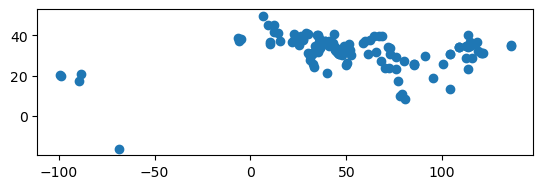

In [40]:
cities.plot();

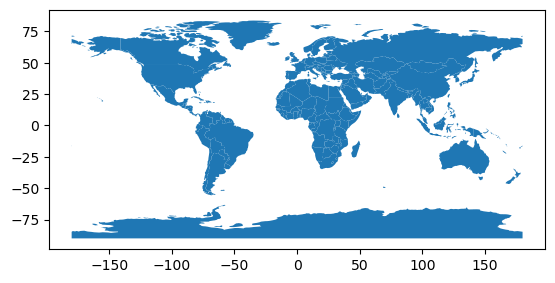

In [41]:
world.plot();

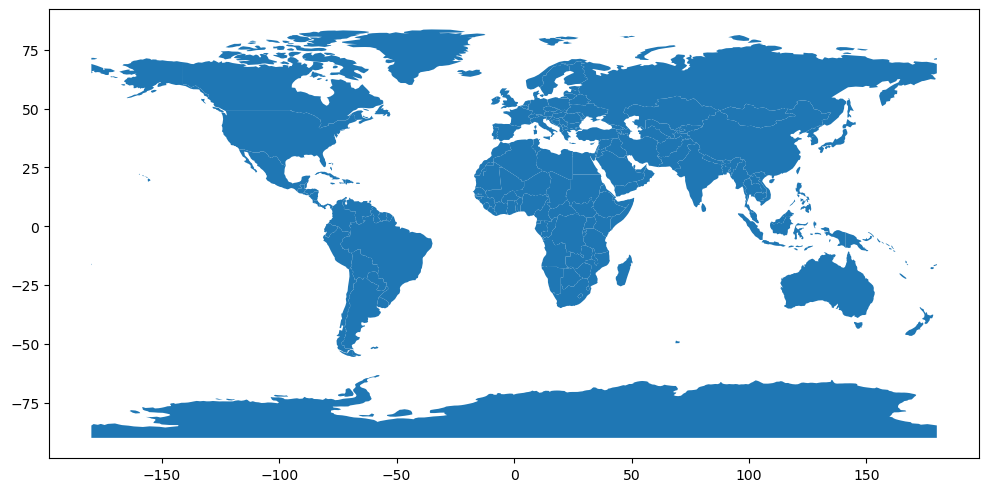

In [42]:
# figsize
world.plot(figsize=(12,8));

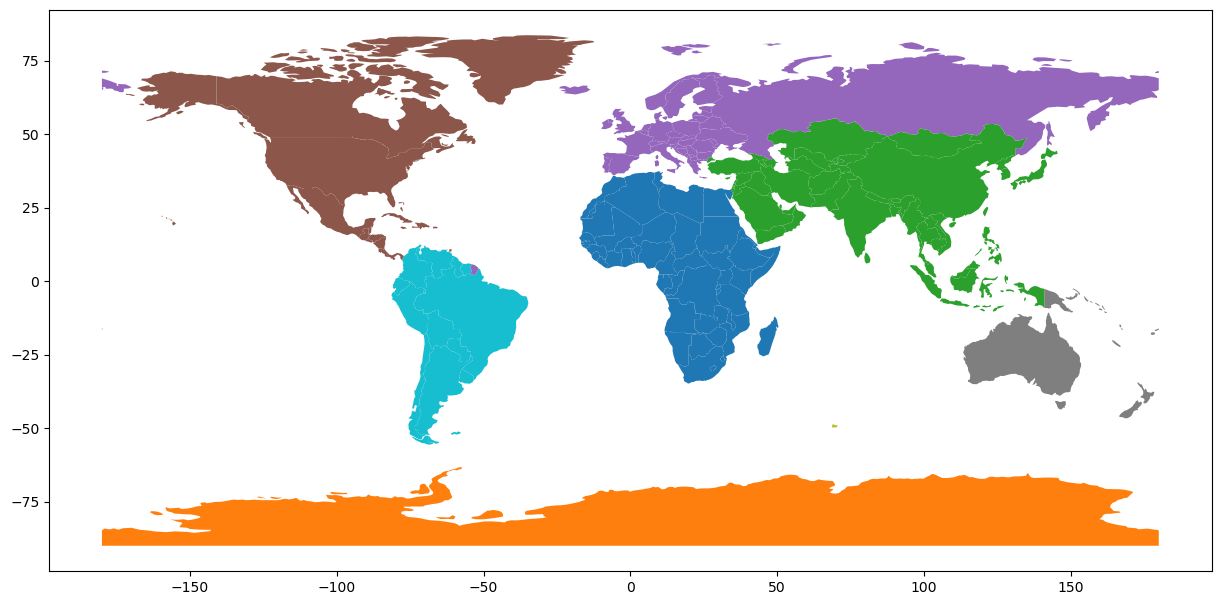

In [43]:
world.plot(column = "continent", figsize=(15,10));

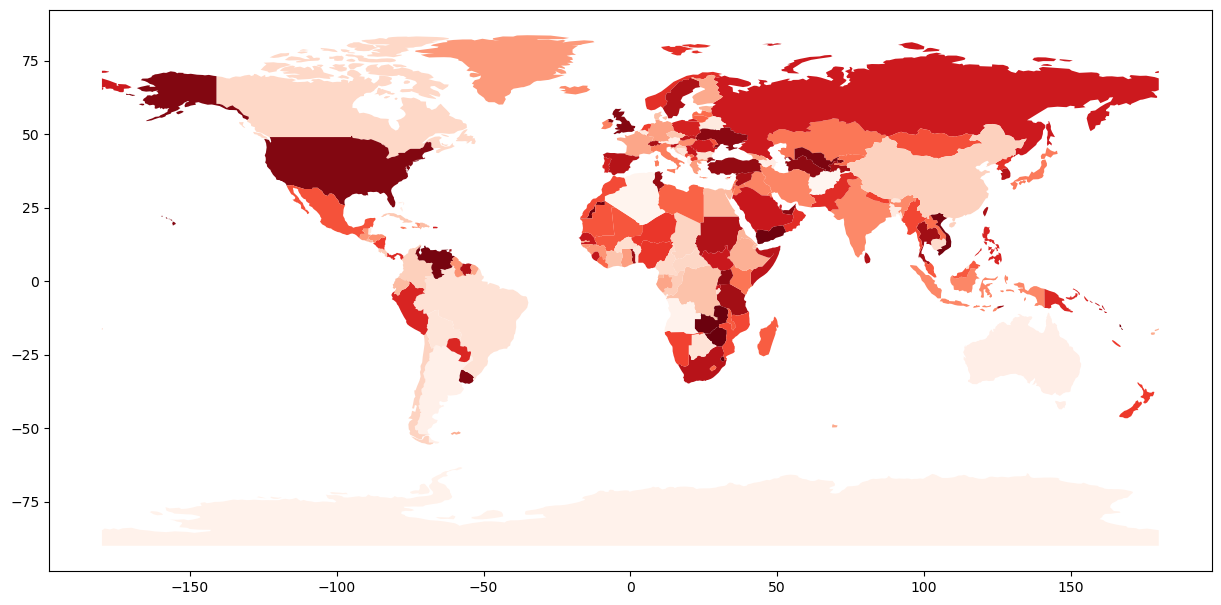

In [44]:
world.plot(column = "name", figsize=(15,10), cmap = 'Reds');

subplots, overlays and axis labels

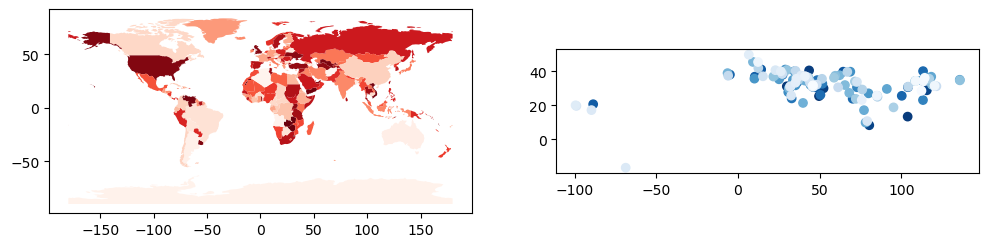

In [45]:
# side by side
fig, ax = plt.subplots(1,2, figsize = (12,10))
# to plot a map in either axis
world.plot(column = "name", figsize=(15,10), cmap = 'Reds', ax = ax[0]);
cities.plot(column= 'City', cmap='Blues_r', ax=ax[1]);

(-198.0, 198.00000000000006, -98.6822565, 92.3273865)

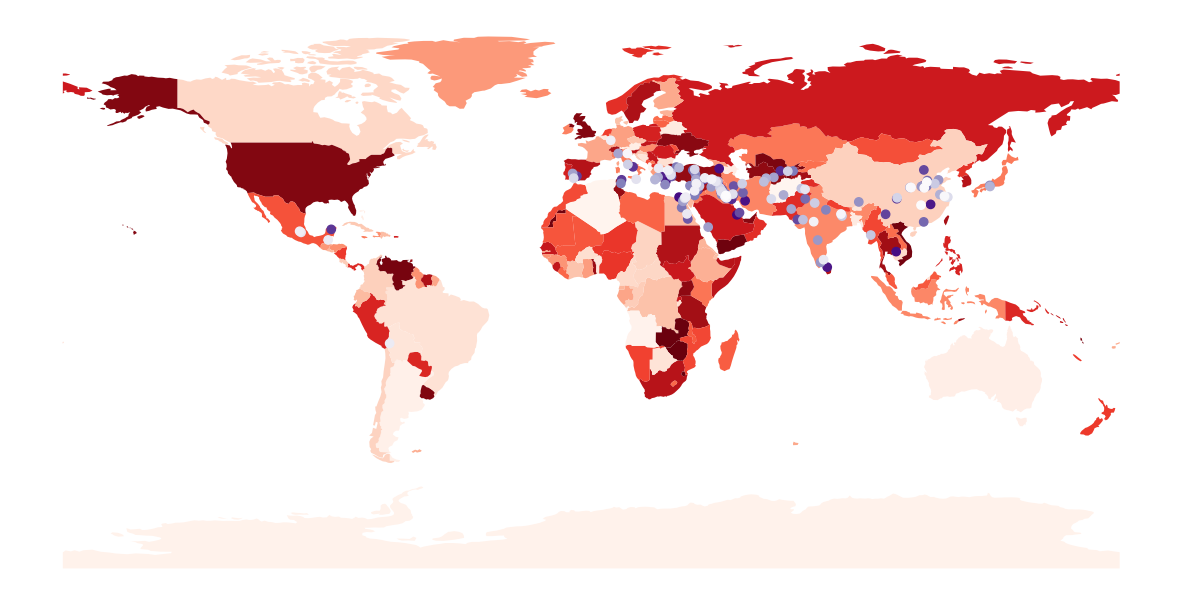

In [46]:
# Overlaying 2 or more plots
fig, ax = plt.subplots(figsize = (15,10))
world.plot(column = "name", figsize=(12,10), cmap = 'Reds', ax = ax);
cities.plot(column= 'City', cmap='Purples_r', ax=ax);
ax.axis('off')


(-12367537.568827353,
 16429801.636366554,
 -2282411.189882081,
 6817707.533187073)

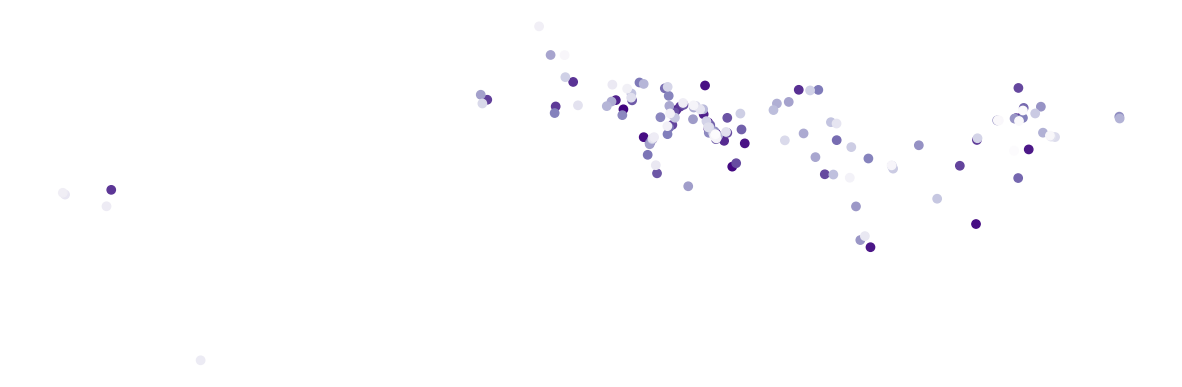

In [47]:
# to change CRS to Mercator
fig, ax = plt.subplots(figsize = (15,10))
world.plot(column = "name", figsize=(12,10), cmap = 'Reds', ax = ax);
cities.to_crs(epsg=3857).plot(column= 'City', cmap='Purples_r', ax=ax);
ax.axis('off')



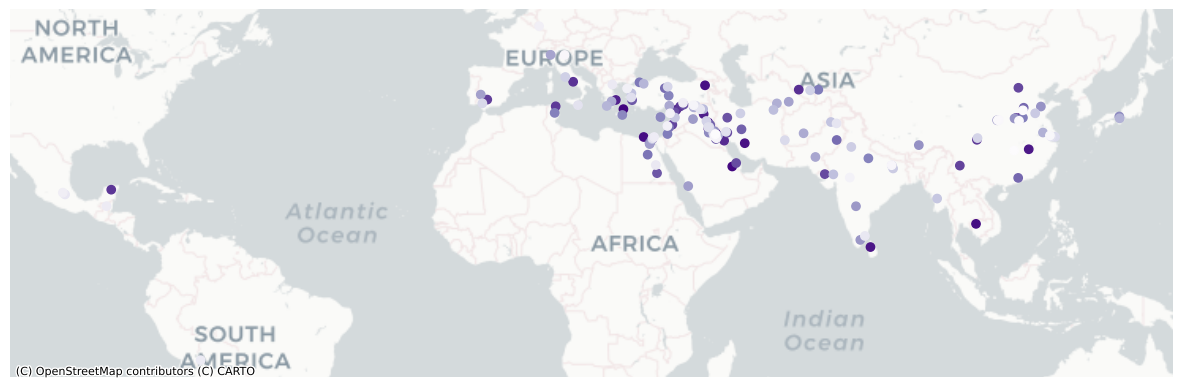

In [48]:
# with basemap
import contextily as ctx

fig, ax = plt.subplots(figsize= (15,12))
cities.to_crs(epsg=3857).plot(column= 'City', cmap='Purples_r', ax=ax);
ctx.add_basemap(
    ax,
    source = ctx.providers.CartoDB.Positron
)
ax.axis("off")
plt.show()

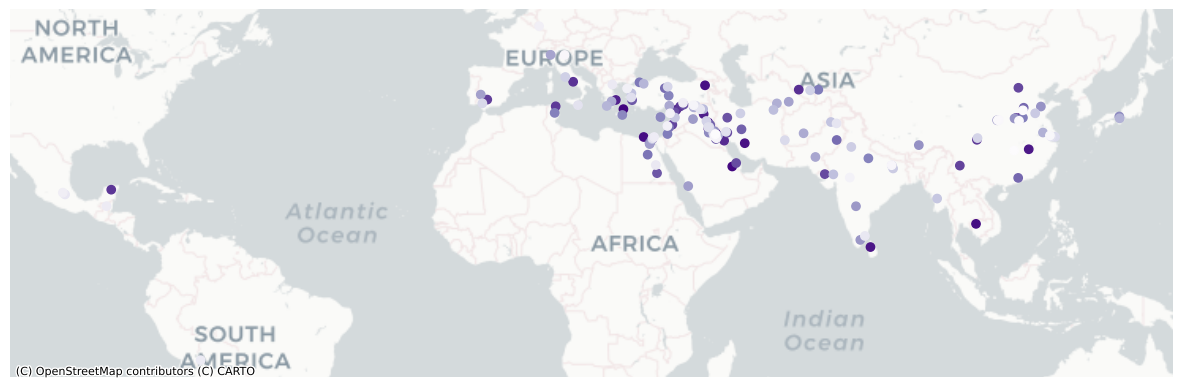

In [55]:
# interactive widget
# %matplotlib widget

fig, ax = plt.subplots(figsize= (15,12))
cities.to_crs(epsg=3857).plot(column= 'City', cmap='Purples_r', ax=ax);
ctx.add_basemap(
    ax,
    source = ctx.providers.CartoDB.Positron
)
ax.axis("off")
plt.show()
